In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Train

In [2]:
data = pd.read_csv('../data/train.csv')
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [3]:
data = data.dropna()
data_clean = data.drop('Id', axis=1)

In [4]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      548 non-null    float64
 1   AF      548 non-null    float64
 2   AH      548 non-null    float64
 3   AM      548 non-null    float64
 4   AR      548 non-null    float64
 5   AX      548 non-null    float64
 6   AY      548 non-null    float64
 7   AZ      548 non-null    float64
 8   BC      548 non-null    float64
 9   BD      548 non-null    float64
 10  BN      548 non-null    float64
 11  BP      548 non-null    float64
 12  BQ      548 non-null    float64
 13  BR      548 non-null    float64
 14  BZ      548 non-null    float64
 15  CB      548 non-null    float64
 16  CC      548 non-null    float64
 17  CD      548 non-null    float64
 18  CF      548 non-null    float64
 19  CH      548 non-null    float64
 20  CL      548 non-null    float64
 21  CR      548 non-null    float64
 22  CS     

In [5]:
print(data_clean['EJ'].unique())
data_clean['EJ'] = data_clean['EJ'].map({'A': 1, 'B': 2})
print(data_clean['EJ'].unique())
print(data_clean['EJ'].dtype)

['B' 'A']
[2 1]
int64


## Test

In [6]:
test = pd.read_csv('../data/test.csv')
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# data_clean -> train
# test -> test

<Axes: xlabel='Class', ylabel='count'>

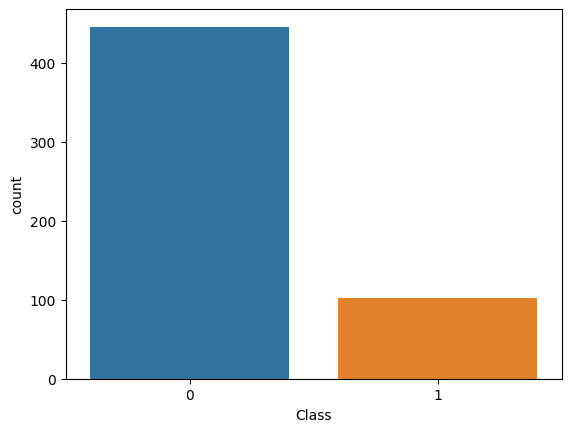

In [8]:
display(sns.countplot(x=data_clean['Class']))

## Class imbalance

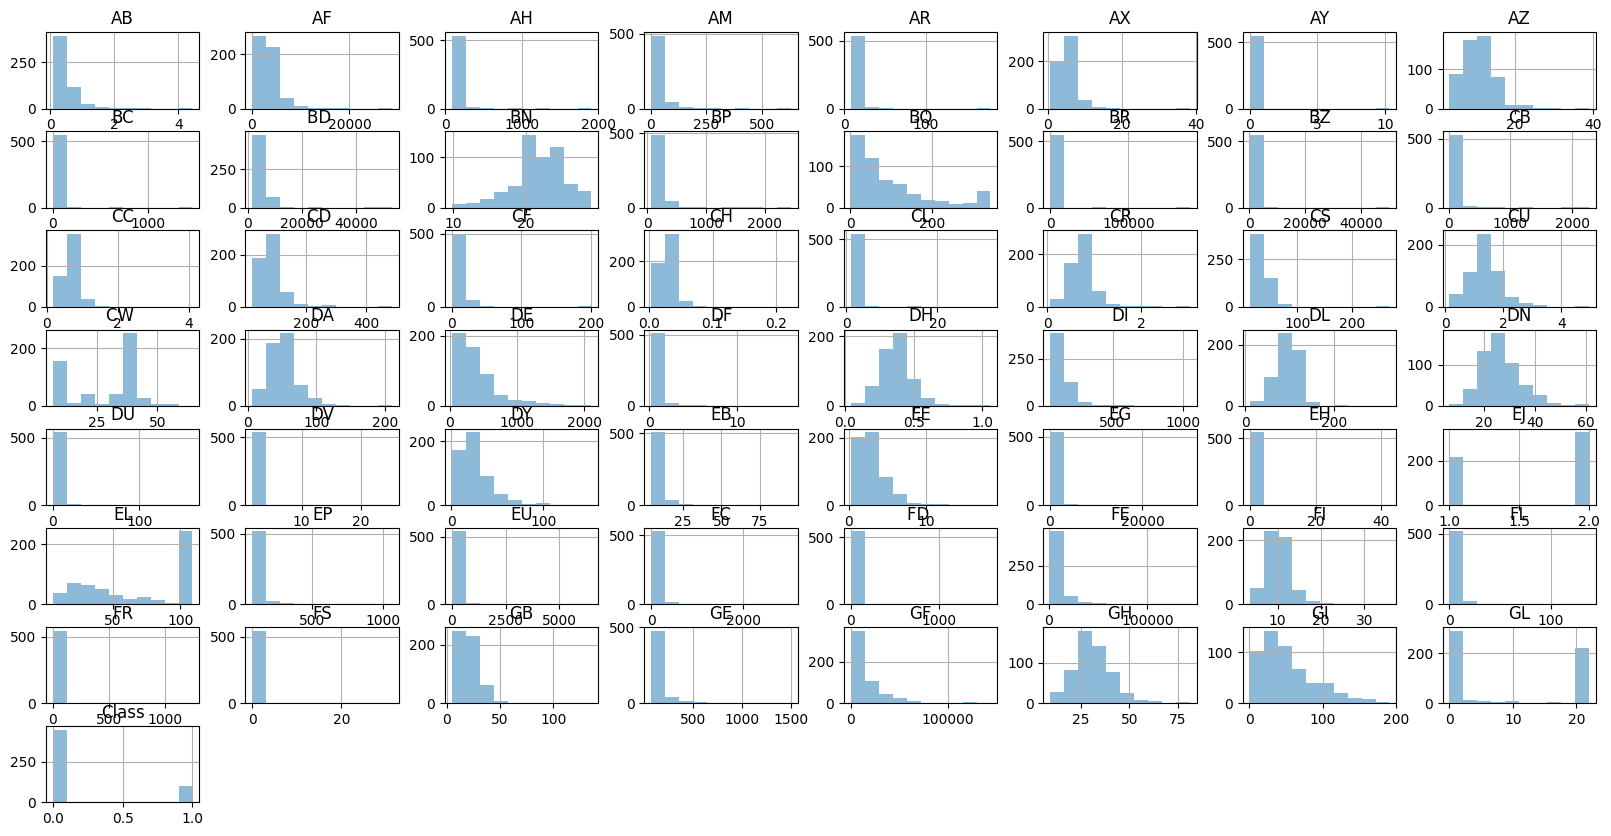

In [9]:
numerical = data_clean.select_dtypes(['number']) 

numerical.hist(alpha=0.5, figsize=(20, 10))
plt.show()

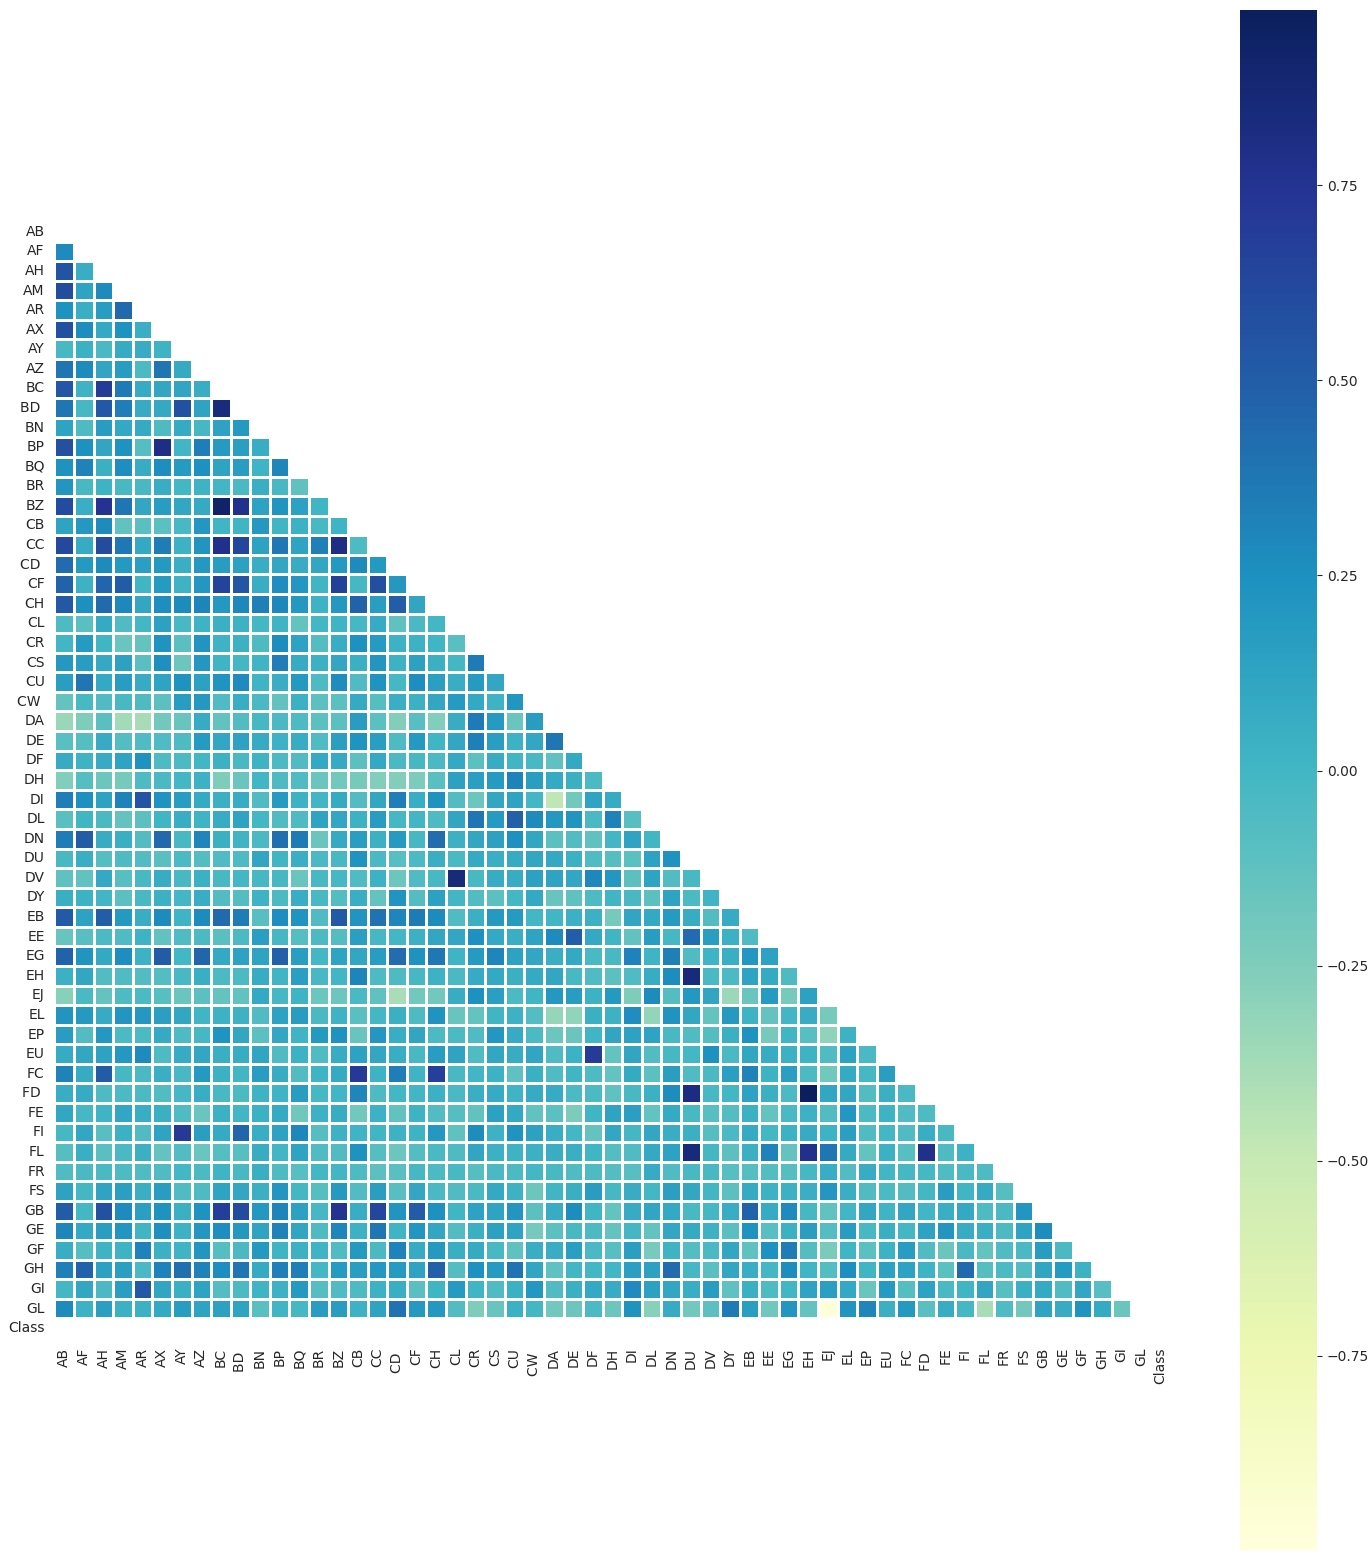

In [10]:
data_class = data_clean[data_clean['Class']==1]
corr = data_class.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

## Downsmapling

In [11]:
from sklearn.model_selection import train_test_split

X = data_clean.drop(columns=['Class'], axis=1)
y = data_clean['Class']

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X, y)

balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['Class'] = y_resampled

<Axes: xlabel='Class', ylabel='count'>

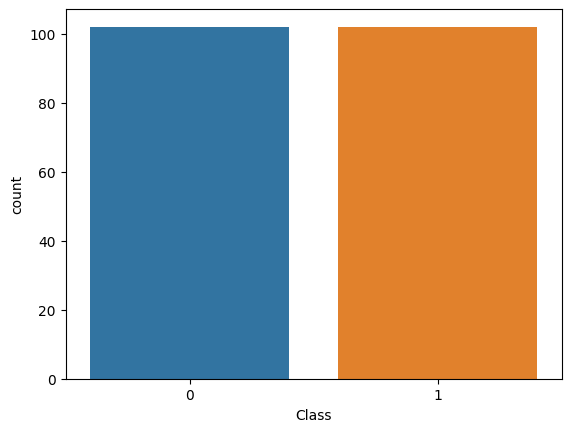

In [13]:
display(sns.countplot(x=balanced_data['Class']))

## Upsampling with SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

X = data_clean.drop('Class', axis=1)
y = data_clean['Class']


smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

smote_data = pd.DataFrame(X_smote, columns=X.columns)
smote_data['Class'] = y_smote

<Axes: xlabel='Class', ylabel='count'>

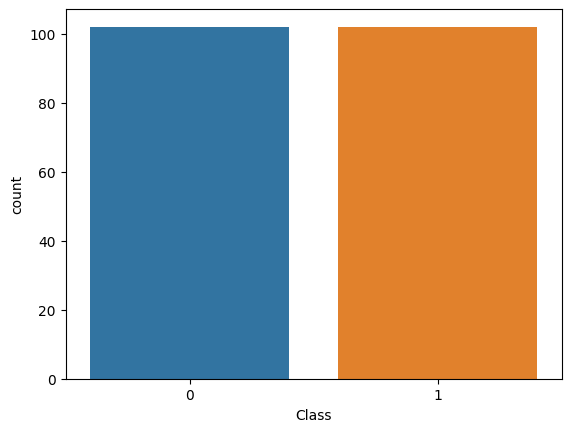

In [15]:
display(sns.countplot(x=balanced_data['Class']))

## Prediction

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.40, random_state=7)

clf = pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('normalizer', MinMaxScaler()),  
        ('model', LogisticRegression(solver='lbfgs'))])


clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat_probab = clf.predict_proba(X_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1 = f1_score(y_test, yhat)
roc_auc = roc_auc_score(y_test, yhat)

# Display the error metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8935574229691877
Precision: 0.8835978835978836
Recall: 0.912568306010929
F1 Score: 0.8978494623655914
ROC AUC Score: 0.8930657622008668


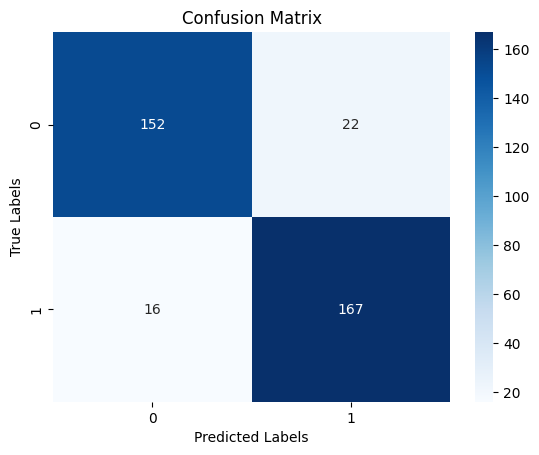

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()